Hello, This is Tarang Balani's Day 1 Week 1 on the path of being an ML engineer.
Today, we're doing Exploratory Data Analysis on the Titanic dataset.

In [1]:
# Day 1 imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set()
%matplotlib inline

In [3]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Okay, now all the libraries have been imported and dataset has been loaded. Now we start the exploration, and for each command, I will be writing one sectence observations.

**Shapes and Types**

In [5]:
print(df.shape)

(891, 15)


Shows the number of rows and columns in the dataframe. What's a dataframe? A DataFrame is a two-dimensional, labeled data structure with columns of potentially different data types

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


Provides a concise summary of a DataFrame. Looking at this, I can tell that there are 14 columns in this dataset, I know what each column's name is, I know how many non-empty or not-null entries there are in those columns. and I also know the type of data in that column. This does help with understanding the data.
an object dtype signifies a column or array where the elements are Python objects of arbitrary types, rather than a specific, uniform numerical or boolean type.
the category dtype is a special data type designed for storing categorical data more efficiently and effectively than standard string or object dtypes.


In [7]:
print(df.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

The describe() method in a DataFrame, gives the information on the descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution.

For numerical columns, it provides:
* count: The number of non-null entries.
* mean: The average value.
* std: The standard deviation, indicating the spread of data.
* min: The minimum value.
* 25% (Q1): The first quartile (25th percentile).
* 50% (Q2): The median (50th percentile).
* 75% (Q3): The third quartile (75th percentile).
* max: The maximum value.

For object (e.g., string) or categorical columns, it typically provides:
* count: The number of non-null entries.
* unique: The number of unique values.
* top: The most frequently occurring value.
* freq: The frequency of the most frequently occurring value.


**Missing Values**

In [10]:
# missing values
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


This tells me in each column, how many entries do not have any values in them, because when they don't have a value in them, they are considered null. and here, the function says df.isnull, this method returns a DataFrame of the same shape as df, but with boolean values. True indicates a missing value (NaN), and False indicates a non-missing value.
.sum() counts the number of True values in each column. In this context, it counts the number of missing values per column.

In [11]:
# quick value counts
for c in ['sex','class','embarked']:
    if c in df.columns:
        print(c, df[c].value_counts(dropna=False))

sex sex
male      577
female    314
Name: count, dtype: int64
class class
Third     491
First     216
Second    184
Name: count, dtype: int64
embarked embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


Through this code, I am able to see that in the columns called sex, class and embarked, which-which values are present and how many times they are present.
dropna=False ensures that missing values (NaN) are also included in the count if they exist in the column.



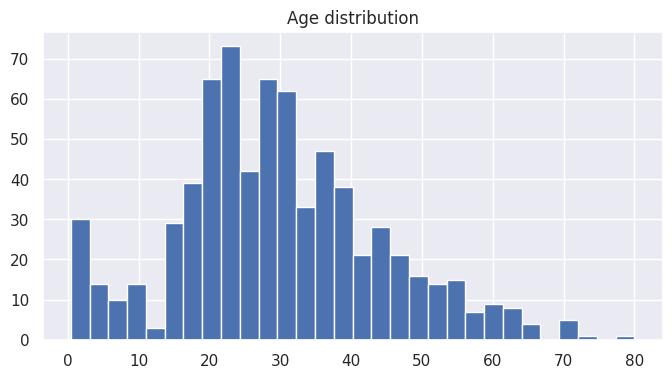

In [12]:
# simple visual checks
plt.figure(figsize=(8,4))
if 'age' in df.columns:
    df['age'].hist(bins=30)
    plt.title('Age distribution')
plt.show()

This code helped me see visually, for 30 different age groups (since bins=30), how many people exist in each.
The histogram is 8 inches wide 4 inches tall.
I can see that most people lie in the age group 20-25. That's nice since that's my age group.

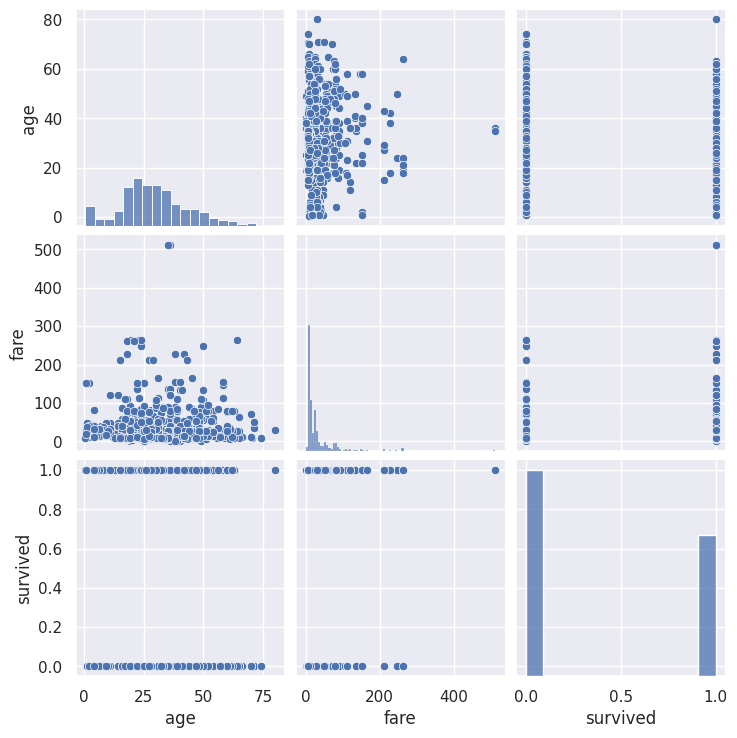

In [13]:
# seaborn pairplot on a few numeric cols (warning: can be slow)
cols = [c for c in ['age','fare','survived'] if c in df.columns]
if len(cols) >= 2:
    sns.pairplot(df[cols].dropna())

now I have made a pair plot using my data, for 3 numerical columns in my dataset.
this helps me in comparing and making conclusions such as:
1. most people on the titanic were in the younger age group
2. most people in the titanic (the younger ones) gave low fares for their journey
3. the amount of people that survived vs that didn't were from all over the distribution of ages
4. same as 2
5. same as 2, this shows the fare distribution in general
6. what was the average fare given by people that survived vs that didn't survive.
7. same as 3
8. same as 6
9. this just shows that more people died than survived.

**Pre-Processing the Data**

In [14]:
# impute age with median
if 'age' in df.columns:
    df['age'] = SimpleImputer(strategy='median').fit_transform(df[['age']])

In [15]:
# drop columns that are noisy or high-cardinality for day 1
for c in ['name','ticket','cabin']:
    if c in df.columns:
        df = df.drop(columns=[c])

In [16]:
# convert categorical to dummies
categorical_cols = [c for c in df.select_dtypes(include=['object','category']).columns if c != 'survived']
if categorical_cols:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [17]:
# drop any remaining rows with target missing
if 'survived' in df.columns:
    df = df.dropna(subset=['survived'])

In [18]:
print(df.shape)
print(df.isnull().sum().sum(), ' total missing values')

(891, 24)
0  total missing values


I have just treated all the missing values in the dataset and now there aren't any missing values in my dataset.

Missing values in the age column are filled using the median value of the 'age' column.

Columns such as 'name', 'ticket', and 'cabin' are dropped if they exist, as they are often considered noisy or have too many unique values (high cardinality), which can be problematic for model training for a beginner like me.

Categorical columns (object or category data types, excluding 'survived' if it's the target variable) are converted into numerical dummy variables using one-hot encoding, with the first dummy variable dropped to avoid multicollinearity.

If a 'survived' column (likely the target variable) exists, any rows with missing values in this column are removed.

The code then prints the shape of the resulting DataFrame and confirms that there are no remaining missing values.


In [19]:
# features / target
target = 'survived' if 'survived' in df.columns else df.columns[-1]
X = df.drop(columns=[target])
y = df[target]

the target variable is the specific value that a machine learning model aims to predict or classify. in our case, it is survived.

features are the individual, measurable properties or characteristics of the data that a model uses to make predictions or classifications. again, in our case, since this is a VERY simple model, it is survived.

this code is specifically setting up the data so that X contains all the columns that might help predict survival (like age, fare, class, etc.), and y contains the 'survived' column, which is the outcome you are trying to predict.

x is a new dataframe while y is a series. a series is a sequence of data points indexed in time order.

In [20]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now, we've split our data into training and testing datasets.
80% of the data is training while 20% is testing.
the random state argument is used to ensure that the split is reproducible. If I use the same random_state value every time I run the code, I will get the same train and test sets. This is helpful for debugging and comparing different models.


In [21]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Scaling is a common preprocessing step in machine learning, especially for algorithms that are sensitive to the scale of the input features (like logistic regression, which I'm gonna use later).

The `StandardScaler` standardizes features by removing the mean and scaling to unit variance. This means that for each feature, it subtracts the mean of that feature from each data point and then divides by the standard deviation of that feature. The result is that each feature will have a mean of 0 and a standard deviation of 1.

It's important to fit the scaler only on the training data to prevent data leakage from the test set into the training process.

We have done fit transform on the training data and just transform on the testing data because we want to scale the test data based on the statistics of the training data to simulate how the model would encounter new data in the real world.


In [22]:
# model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

During the fit process, the Logistic Regression algorithm learns the relationship between the features in X_train and the target variable y_train to build a model that can predict the probability of survival based on the input features.

In [23]:
# evaluate
preds = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



I stored the predictions made by my model in `preds` and then showed that i got positive and perfect outcomes on this particular test set.
Very happy for my first day.